<a href="https://colab.research.google.com/github/Betancur1991/ProyectoPreciosJoyas/blob/main/DiamondsPrices_Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
file='/content/drive/MyDrive/Codificación de Dojo/Modelos/Proyecto/Diamonds Prices2022.csv'

In [209]:
df=pd.read_csv(file)
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [210]:
df=df.drop(columns='Unnamed: 0')
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [211]:
df.shape

(53943, 10)

About the columns x,y, and z they are diamond measurements as (( x: length in mm, y: width in mm,z: depth in mm ))

In [212]:
df.duplicated().sum()

149

In [213]:
df=df.drop_duplicates()

In [214]:
df.shape

(53794, 10)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [216]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [217]:
x_zero=df['x']==0

In [218]:
df[x_zero]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [219]:
df=df.drop([11182, 11963,15951,24520,26243,27429,49556],axis=0)

In [220]:
y_zero=df['y']==0

In [221]:
df[y_zero]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [222]:
z_zero=df['z']==0

In [223]:
df[z_zero]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
26123,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
27112,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0


In [224]:
z_nozero=df['z']!=0

In [225]:
df=df[z_nozero]

In [226]:
df.shape

(53775, 10)

In [227]:
df['clarity'].value_counts().sum()

53775

In [228]:
df['color'].value_counts()

G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: color, dtype: int64

In [229]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [230]:
grup1=df.groupby('cut',as_index=False)['price'].mean()
grup1

,cut,price
0,Fair,4340.677520
1,Good,3916.279051
2,Ideal,3462.148150
3,Premium,4578.913809
4,Very Good,3980.920202


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diamonds price mean of Different Cuts')

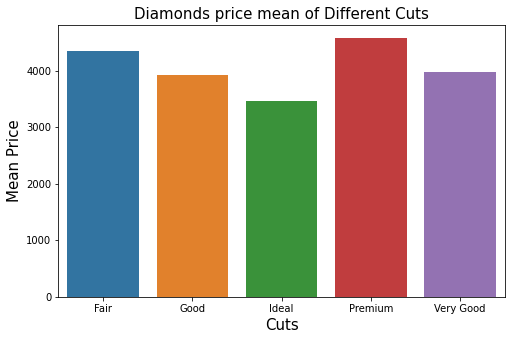

In [231]:
plt.figure(figsize=(8,5))
sns.barplot(grup1['cut'],grup1['price'],)
plt.xlabel('Cuts',fontsize=15)
plt.ylabel('Mean Price',fontsize=15)
plt.title('Diamonds price mean of Different Cuts',fontsize=15)

In [232]:
grup2=df.groupby('clarity',as_index=False)['price'].mean()
grup2

,clarity,price
0,I1,3927.303935
1,IF,2870.569507
2,SI1,3994.271834
3,SI2,5054.529096
4,VS1,3841.299939
5,VS2,3925.614806
6,VVS1,2522.993692
7,VVS2,3286.532437


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diamonds price mean of Different claritys')

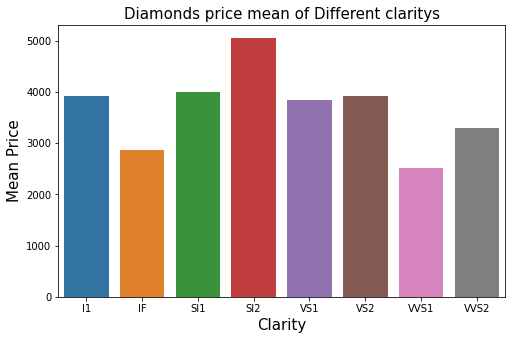

In [233]:
plt.figure(figsize=(8,5))
sns.barplot(grup2['clarity'],grup2['price'],)
plt.xlabel('Clarity',fontsize=15)
plt.ylabel('Mean Price',fontsize=15)
plt.title('Diamonds price mean of Different claritys',fontsize=15)

In [234]:
df['volume'] = df['x']*df['y']*df['z']

In [235]:
df=df.drop(columns=['x','y','z'])

In [236]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


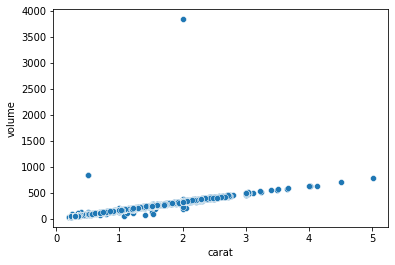

In [237]:
sns.scatterplot(df['carat'],df['volume'],)

hay un valor de volumen atípico, voy a eliminar la fila que contienen este valor, ya que puede afectar el rendimiento del modelo

In [238]:
volumen_atipico=df['volume']>2000

In [239]:
df[volumen_atipico]

,carat,cut,color,clarity,depth,table,price,volume
24067,2.0,Premium,H,SI2,58.9,57.0,12210,3840.59806


In [240]:
df=df.drop([24067],axis=0)

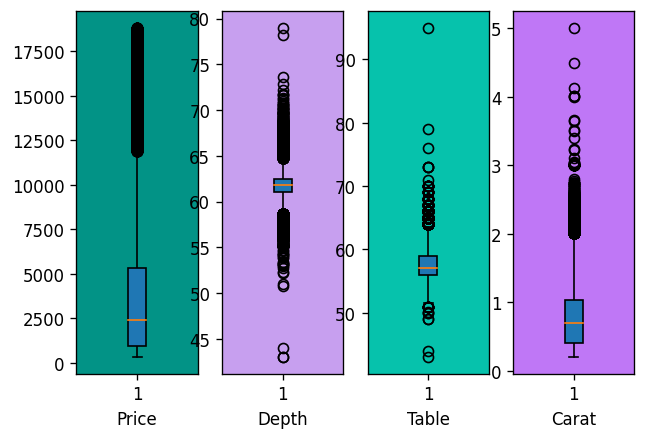

In [241]:
fig=plt.figure(dpi=120)
ax1 = fig.add_subplot(1,4,1)
ax1.boxplot(df['price'], patch_artist=True)
ax1.set_xlabel('Price')
ax1.set_facecolor('xkcd:teal')
ax2 = fig.add_subplot(1,4,2)
ax2.boxplot(df['depth'], patch_artist=True)
ax2.set_xlabel('Depth')
ax2.set_facecolor('xkcd:lavender')
ax3 = fig.add_subplot(1,4,3)
ax3.boxplot(df['table'], patch_artist=True)
ax3.set_xlabel('Table')
ax3.set_facecolor('xkcd:turquoise')
ax4 = fig.add_subplot(1,4,4)
ax4.boxplot(df['carat'], patch_artist=True)
ax4.set_xlabel('Carat')
ax4.set_facecolor('xkcd:light purple')


In [242]:
#fig=plt.figure(dpi=120)
#variables=["'price'","'depth'","'table'","'carat'"]
#colors=["'xkcd:teal'","'xkcd:lavender'","'xkcd:turquoise'","'xkcd:purple'"]

#for i in range(1,5):
  #axi = fig.add_subplot(1,4,i)
  #axi.boxplot(df[i-1], patch_artist=True)
  #axi.set_xlabel(variables[i-1])
  #axi.set_facecolor(colors[i-1])


Como se evidencia en el grafico anterior se presentan muchos outliers sin embargo por ahora no los voy a eliminar para ver como me afecta trabajar con estos

transformo la columna de corte ya que es ordinal

In [243]:
cut_map = {
    'Fair' : 1,
    'Ideal' : 2,
    'Good' : 3,
    'Very Good' : 4,
    'Premium' : 5
}
df['cut_oridnal'] = df.cut.map(cut_map)

In [244]:
df=df.drop(columns='cut')

In [245]:
df.head(3)

,carat,color,clarity,depth,table,price,volume,cut_oridnal
0,0.23,E,SI2,61.5,55.0,326,38.202030,2
1,0.21,E,SI1,59.8,61.0,326,34.505856,5
2,0.23,E,VS1,56.9,65.0,327,38.076885,3


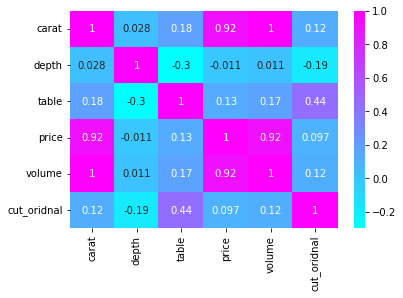

In [246]:
sns.heatmap(df.corr(), annot = True, cmap = 'cool')

Se evidencia una correlación fuerte entre el precio, el volumen y los kilates

y una correlacion moderada entre la tabla y el corte


A continuacion comienzo con el modelado de regresion lineal para vr que tan bien predice los precios de los diamantes

In [247]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

Primero voy a partir mi set de datos de entrenamiento y de test

In [248]:
y = df['price']
X =df.drop(columns = 'price')

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [250]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [251]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [252]:
numeric_pipe = make_pipeline(scaler)

In [253]:
categorical_pipe = make_pipeline(ohe)

In [254]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7effa33ff640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7effa33ff040>)])

In [255]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7effa33ff640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7effa33ff040>)])

In [256]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [257]:
y_train.dtype

dtype('int64')

In [258]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (40330, 20)




array([[ 1.50281005, -1.28929819,  1.59289237, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79560378,  0.38290817, -0.20232847, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00646744, -0.10481869, -0.65113368, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.0908129 , -1.0802724 ,  0.24647674, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21654176,  0.73128449,  0.69528195, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78587363, -1.49832399,  2.04169758, ...,  0.        ,
         0.        ,  0.        ]])

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
reg = LinearRegression()

In [261]:
reg.fit(X_train_processed,y_train)

LinearRegression()

In [262]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.9150315737519353


In [263]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.915700882816517


In [264]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

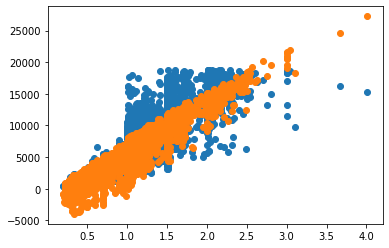

In [265]:
plt.scatter(X_test['carat'],y_test)
plt.scatter(X_test['carat'],test_preds)
plt.show()

In [266]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [267]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.9150315737519353
0.915700882816517


In [268]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

808.7860508785282
799.2608708815121


In [269]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

1357367.6757235227
1316764.3508997718


In [270]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1165.0612326069058
1147.5035297983932


In [271]:
from sklearn.tree import DecisionTreeRegressor

In [272]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [273]:
dec_tree.fit(X_train_processed,y_train)

DecisionTreeRegressor(random_state=42)

In [274]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

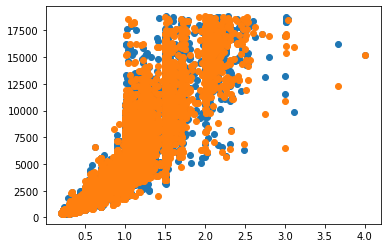

In [275]:
plt.scatter(X_test['carat'],y_test)
plt.scatter(X_test['carat'],test_preds)
plt.show()

In [276]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9999340729811635
0.9647164264145055


In [277]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.9999340729811635
0.9647164264145055


In [278]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

12.64815273989586
362.87930179510073


In [279]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

1053.181849739648
551134.5008347384


In [280]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

32.452763360608415
742.3843349874365


In [281]:
dec_tree.get_depth()

39

In [282]:
dec_tree.get_n_leaves()

33927

In [283]:
from sklearn.ensemble import BaggingRegressor

In [284]:
bagreg = BaggingRegressor(random_state = 42,n_estimators=150)

In [285]:
bagreg.fit(X_train_processed, y_train)

BaggingRegressor(n_estimators=150, random_state=42)

In [286]:
train_preds = bagreg.predict(X_train_processed)
test_preds = bagreg.predict(X_test_processed)

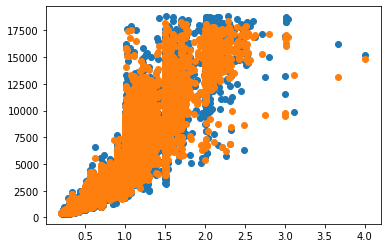

In [287]:
plt.scatter(X_test['carat'],y_test)
plt.scatter(X_test['carat'],test_preds)
plt.show()

In [288]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.9973400366686865
0.9794309894463998


In [289]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

108.3308614624812
286.64571558410074


In [290]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

42492.8223807954
321290.90713145264


In [291]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

206.13787226222016
566.8252880133813
